#### CMSE 201 Final Project
#### Vicente Amado Olivo
#### Section_005
####  4/17/2020

# ___Analysis and Forecasting___

## Background and Motivation

<font size="4">Crude Oil Prices have always been very volatile, and I wanted to understand what affected all of this volatility. Throughout the last 20 years we have seen many peaks and troughs in the oil market. These peaks and troughs have been affected by things such as OPEC supply, OECD demand, or geopolitical events. I remember seeing throughout my life that gas prices when I was young got very expensive, but during the last 6 years gas prices have seemed to decrease.  Through this project I wanted to see if these Crude Oil Prices could be forecasted using machine learning. 

I was motivated to do this project because Venezuela is a country overdependent on oil exports. I was born in Caracas; Venezuela and I was interested on seeing how the Crude Oil economy works. The use of machine learning seemed like a stretch at first, because I am new to coding. However, I wanted to challenge myself and understand what machine learning is through application. How important to getting realistic predictions is detrending data before using Autoregression?</font>

## Methodology

In [218]:
import matplotlib.pyplot as plt  #All imports 
import numpy as np
import pandas as pd
%matplotlib inline
from statsmodels.tsa.ar_model import AR #Autoregression algorithim taken from the statsmodels library

In [ ]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (14, 229, 43),    #different colors to make plots nicer, using different RGB values
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    #Found this code online and refrence it at the end of the notebook
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (7, 124, 22), (148, 55, 55)]
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

This project evolved a lot throughout this process, and I created two models to forecast. I used simple autoregression (AR) using statsmodels to forecast Crude Oil Prices in a univariate model. The prediction values did not turn out realistic when predicting the West Texas Intermediate crude oil prices. I tried to detrend the data, so that the prediction could turn out more realistic. This detrending did not seem to work on the WTI data, therefore I decided to try this out on various variables to see how detrending would affect AR. The time series I choose was from 2001 to 2019. All of the variables have the same time series and are quarterly. 

#### Why Do Oil Prices Rise and Fall?

At the very basics of economics, supply and demand control price. This is the same in the oil industry and is controlled by two organizations. OPEC (The Organization of the Petroleum Exporting Countries) controls most of the world supply and OCED (Organization for Economic Co-operation and Development) has the highest percentage of the world oil demand. When countries in OPEC decided to increase or decrease supply, this can have a major influence on Crude Oil prices. In mid-March Saudi Arabia and Russia (Non-OPEC) disagreed on oil production. This caused a Saudi-Russia oil war that caused prices to tank to almost an 18 year low. 

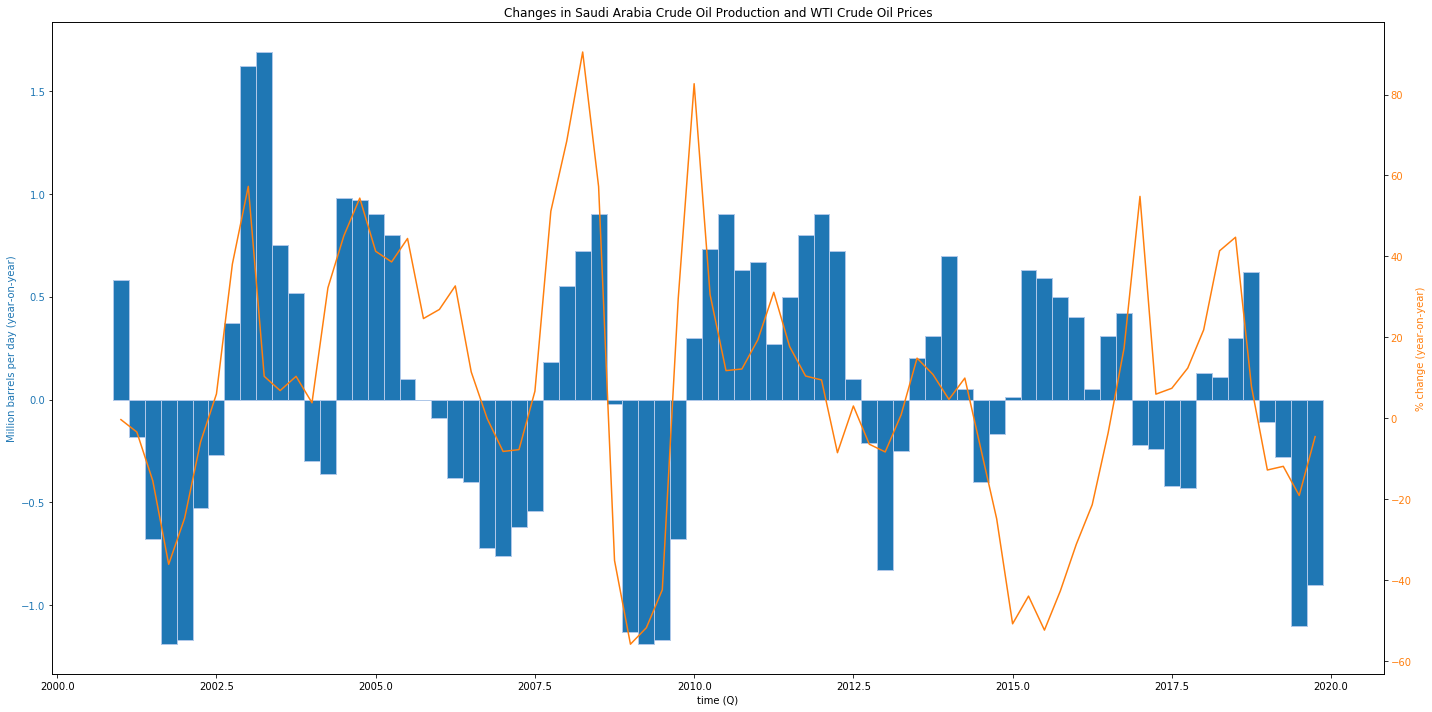

In [201]:
Saudi_date,Saudi_production=np.loadtxt("saudi_production.csv",delimiter=',',skiprows=1,usecols=(0,1),unpack=True) #loading the Saudi Arabian Production data
WTI_Change=np.loadtxt("saudi_production.csv",delimiter=',',skiprows=1,usecols=(2)) #loading the West Texas Intermediate data

fig, ax1 = plt.subplots(figsize=(20,10))

color=tableau20[0] #Used blue from tableau20 table
ax1.set_xlabel('time (Q)')
ax1.set_ylabel('Million barrels per day (year-on-year)', color=color)
ax1.bar(Saudi_date, Saudi_production, color=tableau20[0],edgecolor=tableau20[1],width=0.25)
ax1.tick_params(axis='y', labelcolor=color)# Sets the tick colors for the Saudi Production data y axis

ax2 = ax1.twinx()  #This creates a second y-axis, as to compare the bar plot and line graph

color= tableau20[2]
ax2.set_ylabel('% change (year-on-year)', color=color) 
ax2.plot(Saudi_date, WTI_Change, color=tableau20[2])
ax2.tick_params(axis='y', labelcolor=color)# Sets the tick colors for the WTI data y axis

plt.title('Changes in Saudi Arabia Crude Oil Production and WTI Crude Oil Prices')
fig.tight_layout() 
plt.show()

OPEC has an upward influence on prices. This can be seen through this plot and how Saudi Oil Production and WTI Cude Oil Prices have a similar change over time. As you can see, from 2001 to 2019 the changes in Saudi Arabian crude oil production results in changes in WTI crude oil prices.

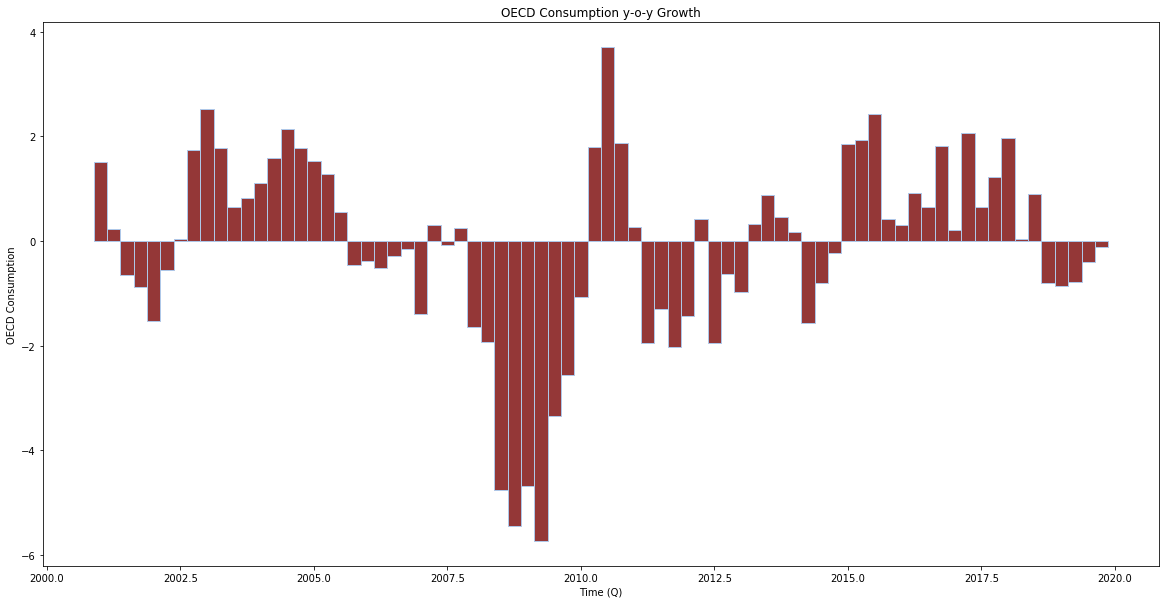

In [202]:
OECD_date,OECD_consumption=np.loadtxt("OECD_consumption.csv",delimiter=',',skiprows=1,usecols=(0,1),unpack=True)

plt.figure(figsize=(20,10))

plt.title("OECD Consumption y-o-y Growth")
plt.bar(OECD_date,OECD_consumption,color=tableau20[19],edgecolor=tableau20[1],width=0.25)#plotted the OECD consumption from 2001-2019 to show the demand side of the oil industry
plt.xlabel("Time (Q)")
plt.ylabel("OECD Consumption")
fig.tight_layout() 
plt.show()

In OECD countries, price increases have coincided with lower consumption. OECD also has some upward influence on prices due to their demand. In years that OECD Consumption decreased there has also been a decrease in WTI oil prices. 

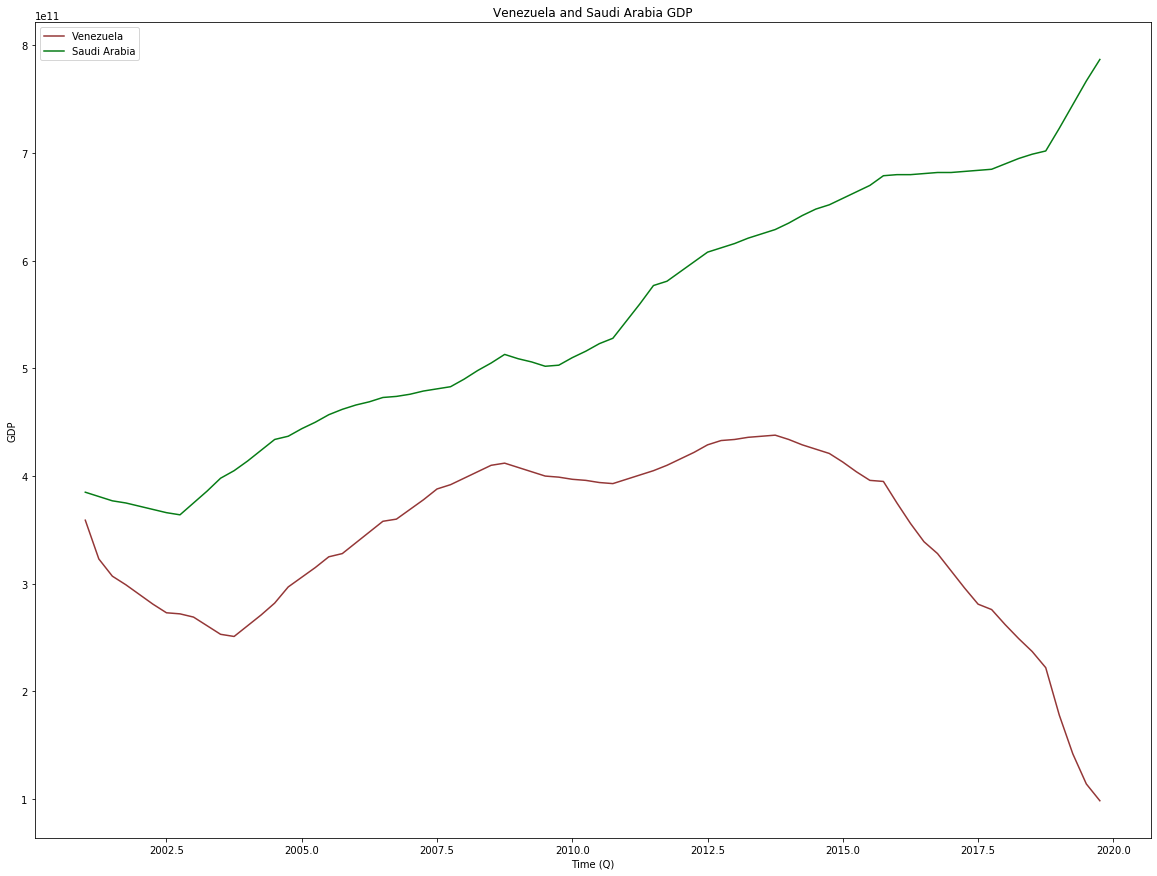

In [206]:
Time,Ecuador, Iraq, Russia, Saudi_Arabia,Venezuela=np.loadtxt("GDP.csv",delimiter=',',skiprows=1,dtype=float,usecols=(0,1,2,5,4,3),unpack= True)
plt.figure(figsize=(20,15))

plt.title("Venezuela and Saudi Arabia GDP")#Plotted Venzuela and Saudia Arabia GDP from 2001-2019 to show the influence of specific countries on the oil industry
plt.plot(Time,Venezuela,color=tableau20[19],label='Venezuela')
plt.xlabel("Time (Q)")
plt.ylabel("GDP")


plt.plot(Time,Saudi_Arabia,color=tableau20[18], label='Saudi Arabia')
plt.xlabel("Time (Q)")
plt.ylabel("GDP")

plt.legend(loc="upper left")

I also wanted to use the GDP data from countries that were oil dependent. I choose Venezuela and Saudi Arabia, because Venezuela has had a constant decrease in GDP this last decade while Saudi Arabia has had a constant increase. Saudi Arabia has a strong influence on OPEC and has been able to use that influence to increase their GDP, as well as diversifying their market. However, Venezuela has been in political conflict and has not diversified their market, but continued to depend on oil.  

In [4]:
Oil_Data = pd.read_csv("CMSE Project Full Data 2.csv")# reading in data using pandas

In [5]:
Oil_Data.tail()#Wanted to see if there were any rows filled with NaNs

,DATE,POILBREUSDQ,POILWTIUSDQ,Saudi Production Change,WTI Production Change,y-o-y % OECD Consumption Change,non-OPEC Production change,WTI Real Price (GDP Deflated),non-OECD Consumption Growth,non-OECD GDP growth,Ecuador,Iraq,"Venezuela, RB",Saudi Arabia,Russian Federation,WTI Futures Price,Brent Futures Price,Dates,Quarter
71,10/1/2018,67.37,58.65,0.62,7.83,-0.81,3.50,51.50,2.08,3.13,8.860000e+10,2.110000e+11,2.220000e+11,7.020000e+11,1.720000e+12,65.31,75.47,2018.75,4
72,1/1/2019,63.27,54.83,-0.11,-12.84,-0.86,2.47,47.25,2.11,2.39,9.120000e+10,2.190000e+11,1.780000e+11,7.230000e+11,1.710000e+12,53.79,61.89,2019.00,1
73,4/1/2019,68.34,59.76,-0.28,-11.93,-0.79,2.14,51.36,1.71,2.20,9.400000e+10,2.280000e+11,1.420000e+11,7.450000e+11,1.690000e+12,63.91,72.80,2019.25,2
74,7/1/2019,61.86,56.40,-1.10,-19.14,-0.41,1.45,48.06,2.04,2.11,9.680000e+10,2.370000e+11,1.140000e+11,7.670000e+11,1.680000e+12,58.58,65.17,2019.50,3
75,10/1/2019,62.66,56.98,-0.90,-4.58,-0.11,1.65,48.33,2.08,2.10,1.080000e+11,2.470000e+11,9.840000e+10,7.870000e+11,1.670000e+12,54.18,60.23,2019.75,4


In [208]:
Oil_Data.dtypes #Checking to see what the data types of the data set are

DATE                               float64
Quarter                            float64
POILWTIUSDQ                        float64
Saudi Production Change            float64
WTI Production Change              float64
y-o-y % OECD Consumption Change    float64
non-OPEC Production change         float64
WTI Real Price (GDP Deflated)      float64
non-OECD Consumption Growth        float64
non-OECD GDP growth                float64
Ecuador                            float64
Iraq                               float64
Venezuela, RB                      float64
Saudi Arabia                       float64
Russian Federation                 float64
WTI Futures Price                  float64
Brent Futures Price                float64
Dates                              float64
dtype: object

In [209]:
Oil_Data.describe() #Understanding the data set better, by looking at the Oil_Data descriptive statistics 

,DATE,Quarter,POILWTIUSDQ,Saudi Production Change,WTI Production Change,y-o-y % OECD Consumption Change,non-OPEC Production change,WTI Real Price (GDP Deflated),non-OECD Consumption Growth,non-OECD GDP growth,Ecuador,Iraq,"Venezuela, RB",Saudi Arabia,Russian Federation,WTI Futures Price,Brent Futures Price,Dates
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000
mean,2010.118421,2.500000,63.423421,0.072895,8.311842,-0.090789,0.986842,62.822368,3.366579,5.222763,7.085395e+10,1.469842e+11,3.422289e+11,5.480789e+11,1.460618e+12,63.805395,67.167763,2010.375000
std,5.457636,1.125463,25.573647,0.659031,31.551224,1.801057,0.984437,24.101029,1.878223,2.119006,1.500755e+10,4.794432e+10,7.923703e+10,1.176569e+11,2.425238e+11,26.043117,29.735925,5.520794
min,2001.000000,1.000000,20.360000,-1.190000,-55.910000,-5.740000,-1.100000,24.500000,-1.360000,0.580000,4.700000e+10,6.470000e+10,9.840000e+10,3.640000e+11,9.500000e+11,19.480000,19.180000,2001.000000
25%,2005.750000,1.750000,45.375000,-0.385000,-8.280000,-0.867500,0.350000,43.027500,2.110000,3.717500,5.857500e+10,1.040000e+11,2.817500e+11,4.607500e+11,1.270000e+12,46.422500,47.577500,2005.687500
50%,2010.000000,2.500000,59.675000,0.100000,7.600000,0.195000,0.770000,59.395000,3.190000,4.780000,6.885000e+10,1.350000e+11,3.595000e+11,5.195000e+11,1.550000e+12,60.165000,65.245000,2010.375000
75%,2015.000000,3.250000,85.857500,0.597500,29.770000,1.132500,1.650000,84.135000,4.440000,7.275000,8.575000e+10,1.852500e+11,4.040000e+11,6.595000e+11,1.670000e+12,86.172500,88.237500,2015.062500
max,2019.000000,4.000000,124.070000,1.690000,90.520000,3.710000,3.500000,126.640000,9.730000,9.150000,1.080000e+11,2.470000e+11,4.380000e+11,7.870000e+11,1.720000e+12,124.080000,125.890000,2019.750000


After analyzing the data and understanding how the Oil market works, I next made an autoregression model. The machine learning process was new to me at first, however, after looking at many examples I finally was able to understand the flow. When using a machine learning algorithm to forecast, you first take a portion of your data and run it through your algorithm. This then predicts values that you already have, since you did not use your whole data set. Therefore, you use those values to test against the predictions. As A Result, you then change your hyperparameters such as your lags to see what the greatest combination is to have the best predictions. The definition of hyperparameters according to towarddatascience.com, “Hyperparameters are settings that can be tuned to control the behavior of a machine learning algorithm”. In this case the lags are a hyperparameter that decide on how many previous data points to use when predicting. In my models I use a lag of 10, because that is where I found the best predictions.

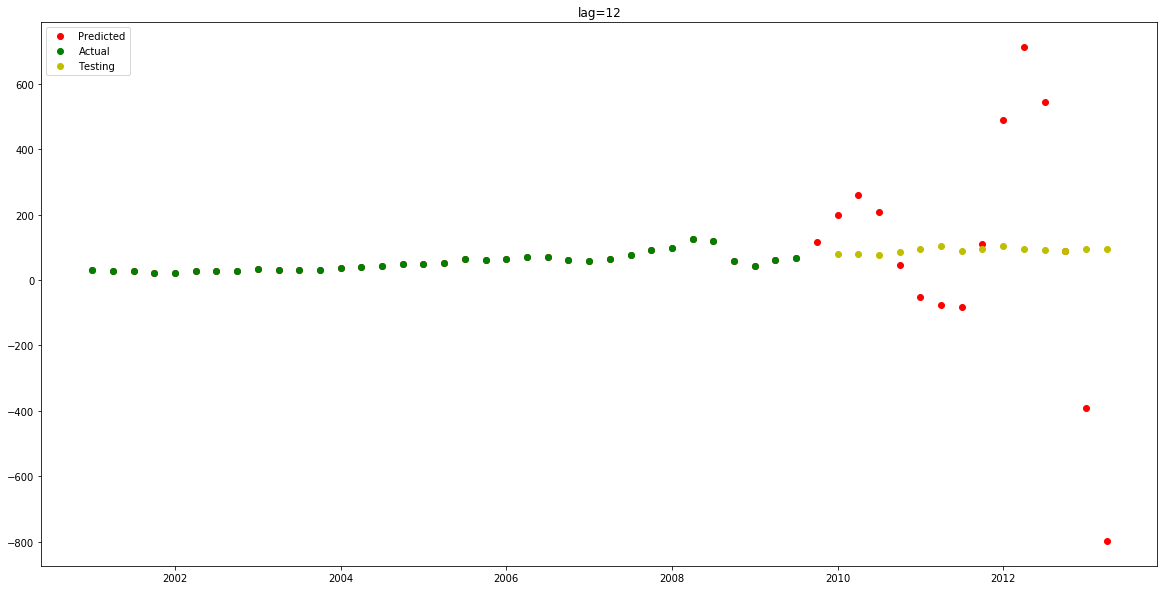

In [210]:
mdata = Oil_Data[0:35]#Splitting data in half to fit the model and play around with hyperparameters

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = mdata['POILWTIUSDQ']#WTI Oil model 

for iteration in range(num_predictions):
    
    model = AR(data)
    model_fit = model.fit(maxlag=10)# fit model 

    yhat= model_fit.predict(len(data), len(data))# make prediction
    data= np.append(data,yhat)# forecast
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']
plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:35],mdata['POILWTIUSDQ'],'go',label='Actual')
plt.plot(test_time,test_data['POILWTIUSDQ'],'yo',label='Testing')
plt.legend(loc="upper left")

As I was playing around with the hyperparameters I noticed that the values were not realistic. The Crude Oil Price predictions went very negative and this is because the data I put through the AR(p) started to oscillate near the end of the data. It makes sense that the prediction would increase that oscillation, however, those predictions are not realistic. Through recommendation from Professor Murillo, the next step was to detrend the WTI Oil data to see if It could help the AR prediction. 

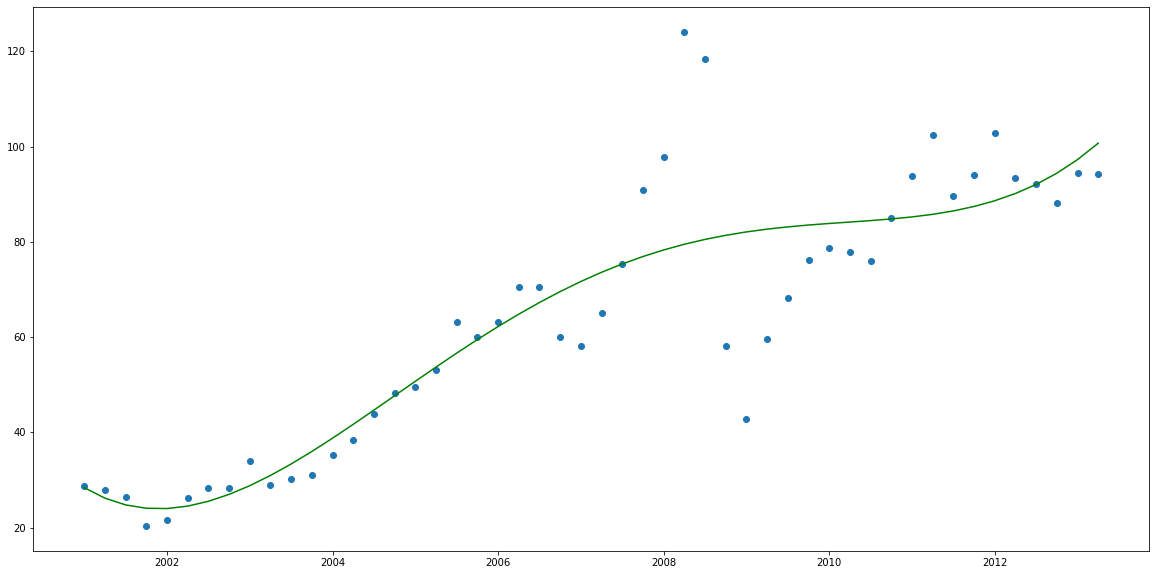

In [215]:
mdata=Oil_Data[0:50]
t=np.polyfit(time[0:50],mdata['POILWTIUSDQ'],4)#Calling polyfit 

my_oil_poly_function=np.poly1d(t)#Calling poly1d

expected_oil_poly=my_oil_poly_function(time[0:50])

plt.figure(figsize=(20,10))
plt.scatter(time[0:50],mdata['POILWTIUSDQ'])
plt.plot(time[0:50],expected_oil_poly, color='green')

The WTI oil data was fitted to poly1d, so that the WTI oil data could then be subtracted from the fitted line. I decided to use a higher order polynomial, because it helped detrend the data. The process to fit the data is the same we used during the semester and learned in class.

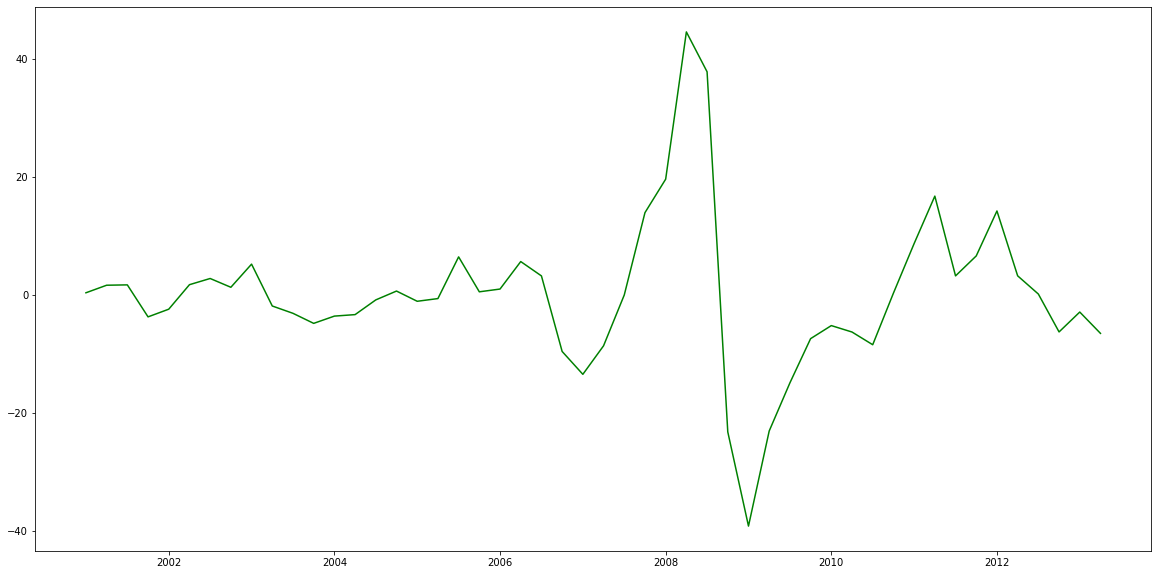

In [216]:
detrending=mdata['POILWTIUSDQ']-expected_oil_poly#Subtracted the fitted line from the the Oil data to detrend data

plt.figure(figsize=(20,10))
plt.plot(time[0:50],detrending, color='green')

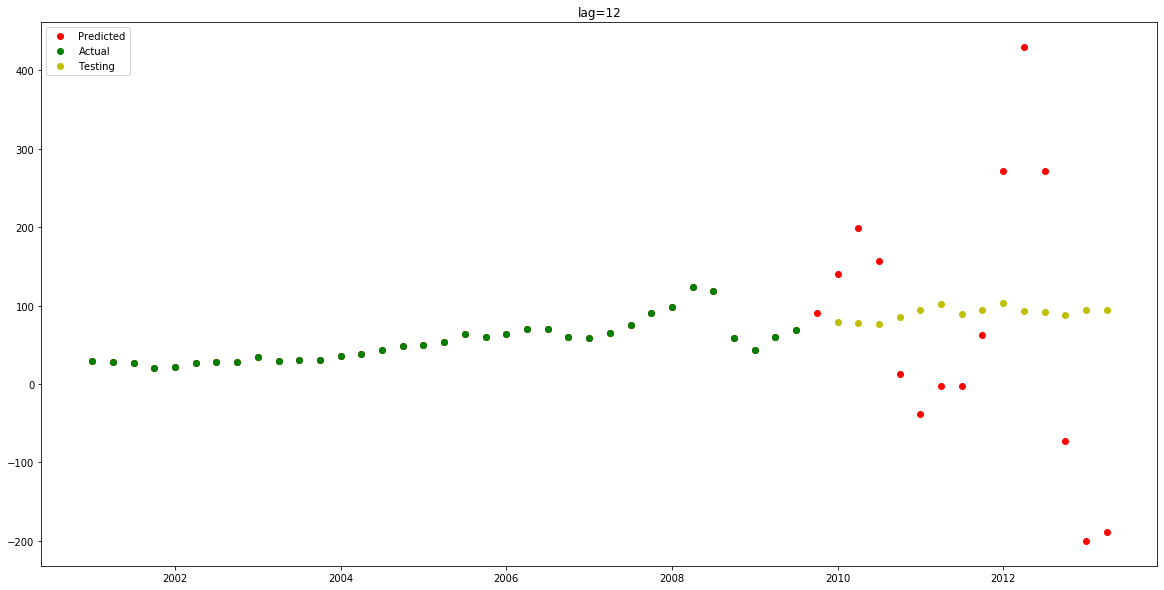

In [214]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = detrending[0:35]

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']

data=data+expected_oil_poly

plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:35],mdata['POILWTIUSDQ'],'go',label='Actual')
plt.plot(test_time,test_data['POILWTIUSDQ'],'yo',label='Testing')
plt.legend(loc="upper left")

After going through the detrending process, the next step was to run this new data through AR to see how the prediction would change. After going through the AR algorithm, the fitted line was added back in to show the actual values, but detrended.  After going through the detrend process, the WTI oil data did help increase the predictions and while the predictions still become negative, even though they should not because oil price will never be negative. 

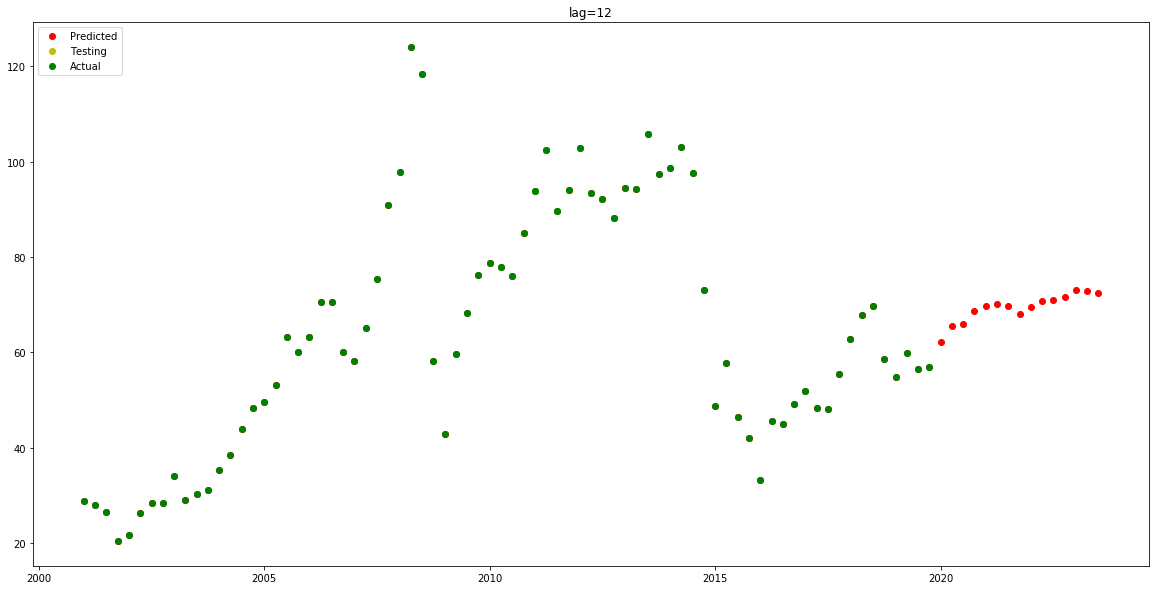

In [48]:
mdata = Oil_Data[0:76]

num_points = len(Oil_Data[0:76])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = mdata['POILWTIUSDQ']

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=12)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
ndata = Oil_Data[0:76] 
plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(test_time,test_data['POILWTIUSDQ'],'yo',label='Testing')
plt.plot(time[0:76],ndata['POILWTIUSDQ'],'go',label='Actual')
plt.legend(loc="upper left")

The next step is to run all of the available data through the AR algorithm, to see what the predictions are for the future. The full data for WTI oil data was run through the AR and this was a much better prediction. Even though this data was a lot noisier, the prediction was much more realistic. 

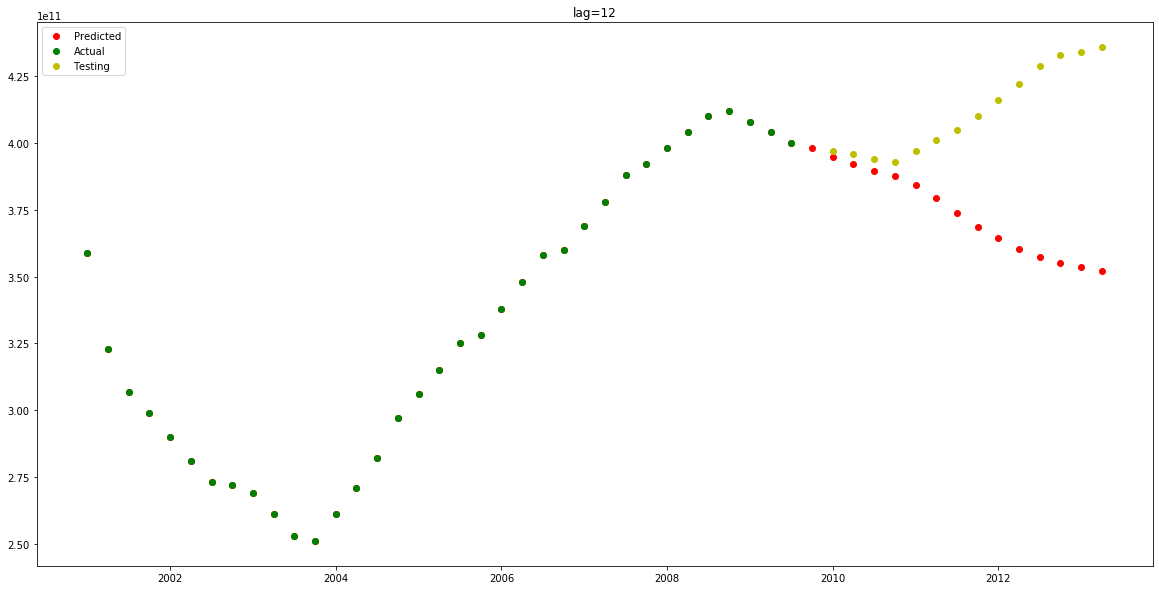

In [243]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = mdata['Venezuela, RB']

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']
plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:35],mdata['Venezuela, RB'],'go',label='Actual')
plt.plot(test_time,test_data['Venezuela, RB'],'yo',label='Testing')
plt.legend(loc="upper left")

Then we made another AR model to see how detrending affected the predictions of various variables and to see if detrending was important enough to always implement when forecasting. The second variable used, was the Venezuelan GDP from 2001-2019. This original AR model had more realistic values from the initial VR model, unlike the WTI oil data. However, the predicted values were still lower than the actual values during the testing period. 

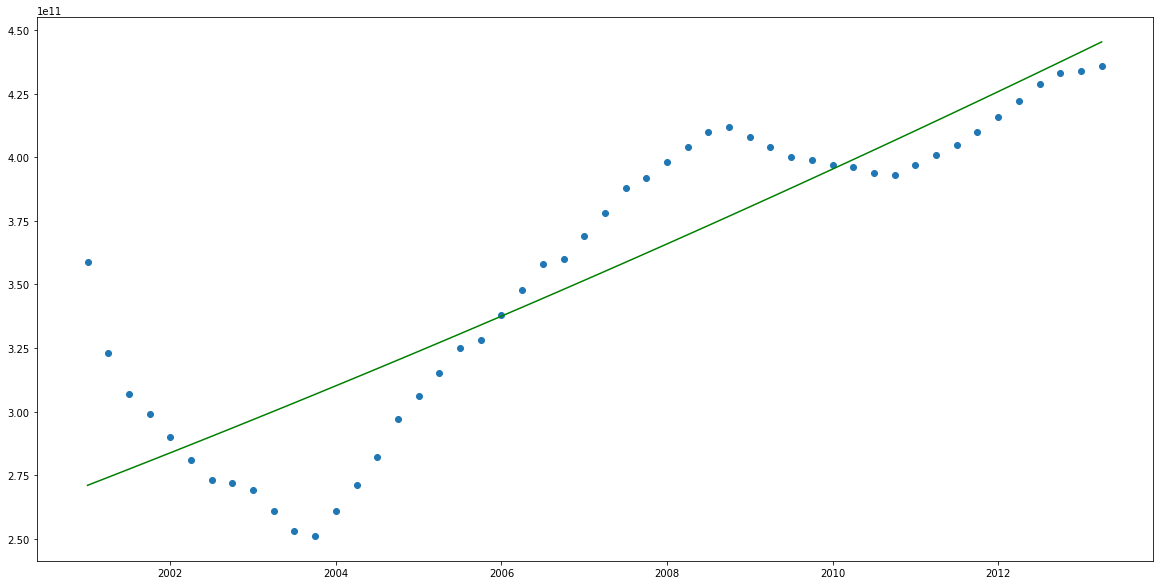

In [254]:
mdata=Oil_Data[0:50]
t=np.polyfit(time[0:50],mdata['Venezuela, RB'],2)

my_oil_poly_function=np.poly1d(t)

expected_oil2_poly=my_oil_poly_function(time[0:50])

plt.figure(figsize=(20,10))
plt.scatter(time[0:50],mdata['Venezuela, RB'])
plt.plot(time[0:50],expected_oil2_poly, color='green')

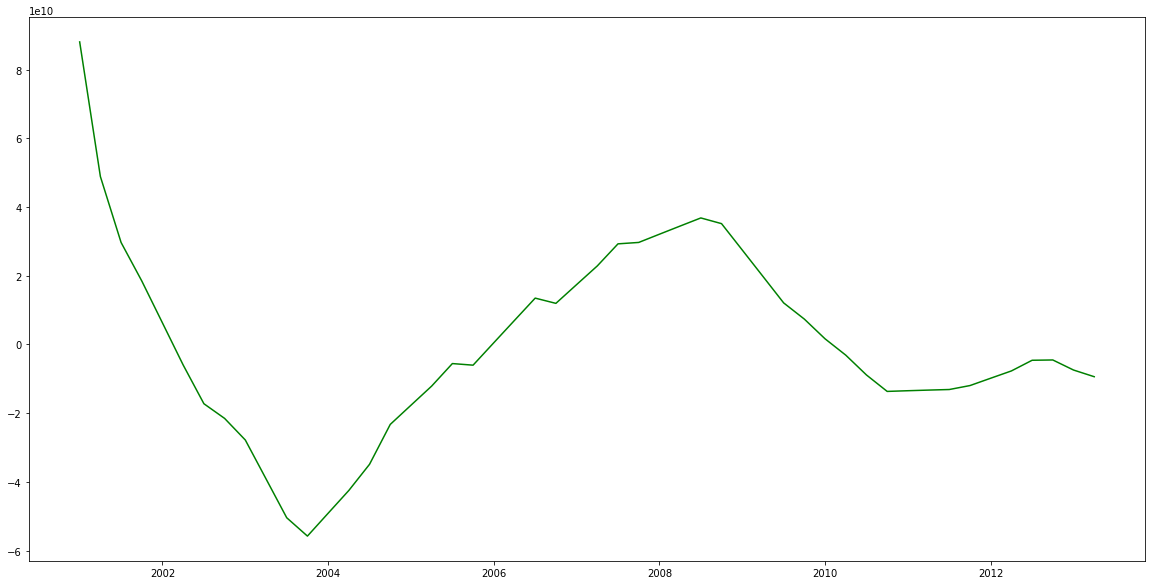

In [255]:
detrending2=mdata['Venezuela, RB']-expected_oil2_poly


plt.figure(figsize=(20,10))
plt.plot(time[0:50],detrending2, color='green')

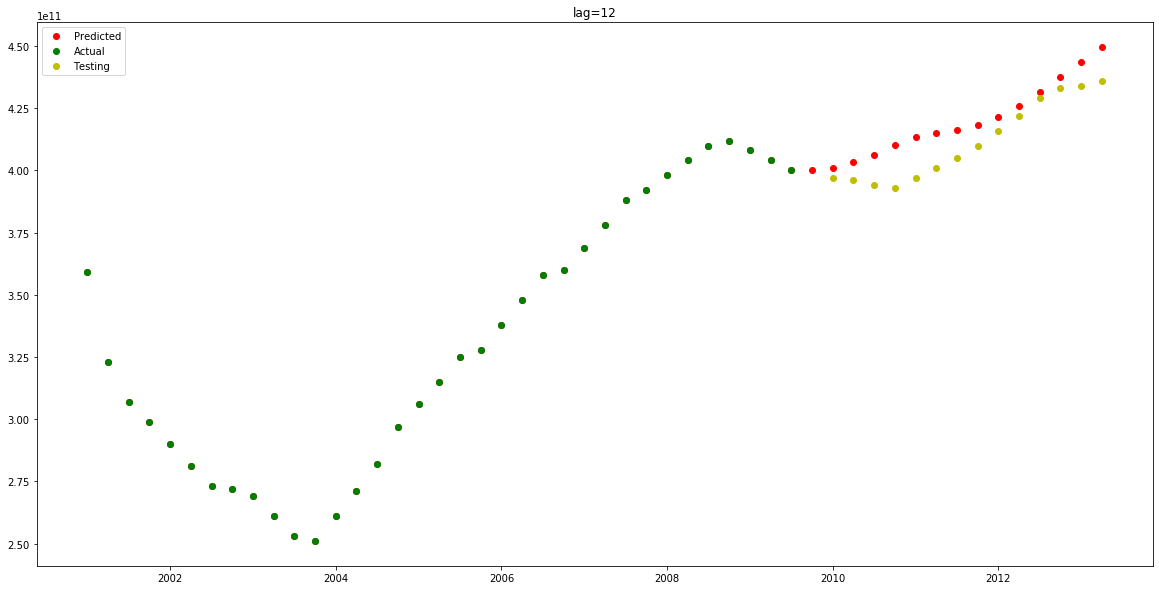

In [256]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = detrending2[0:35]

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']

data=data+expected_oil2_poly

plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:35],mdata['Venezuela, RB'],'go',label='Actual')
plt.plot(test_time,test_data['Venezuela, RB'],'yo',label='Testing')
plt.legend(loc="upper left")

After we go through the same process with the Venezuelan GDP data, we can see that the detrending process helped the predictions become more realistic. This is different from the first model we made with the WTI oil data, and it is significant to show us that detrending can help the AR process. This prediction compared to the testing data, is much closer than before the detrending process. I want to see how this affects other predictions and if it is important to the AR process. 

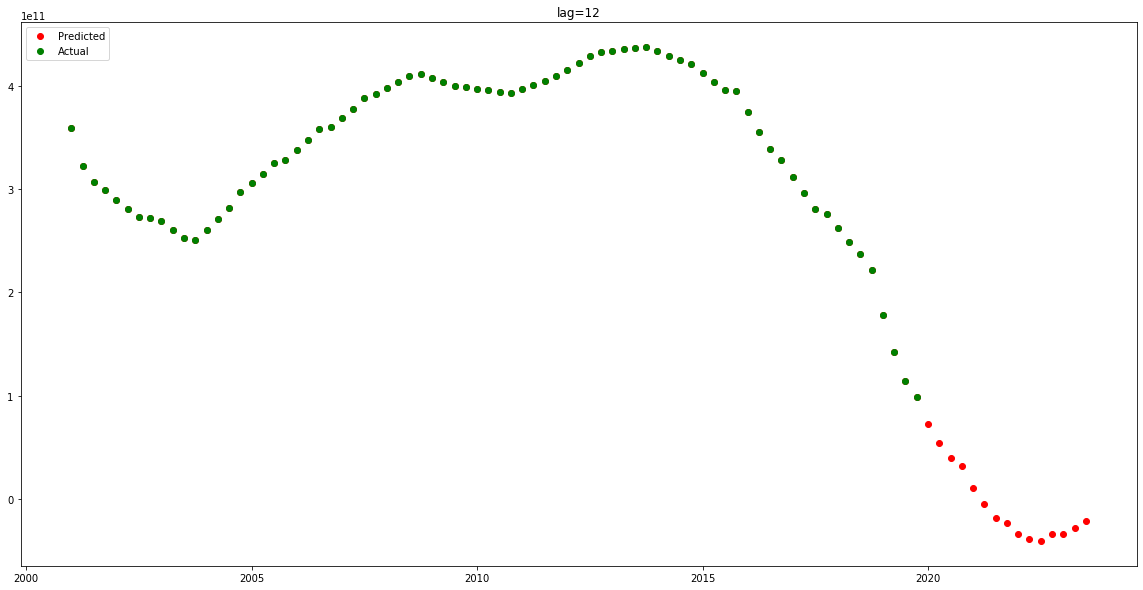

In [192]:
mdata = Oil_Data[0:76]

num_points = len(Oil_Data[0:76])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = mdata['Venezuela, RB']

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
ndata = Oil_Data[0:76] 
plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:76],ndata['Venezuela, RB'],'go',label='Actual')
plt.legend(loc="upper left")

The full Venezuelan GDP data is then run through the AR algorithm. This prediction I believe is accurate, based on the current situation in Venezuela, but also due to the testing process. The testing process showed us that the AR algorithm was accurately predicting the Venezuelan GDP. 

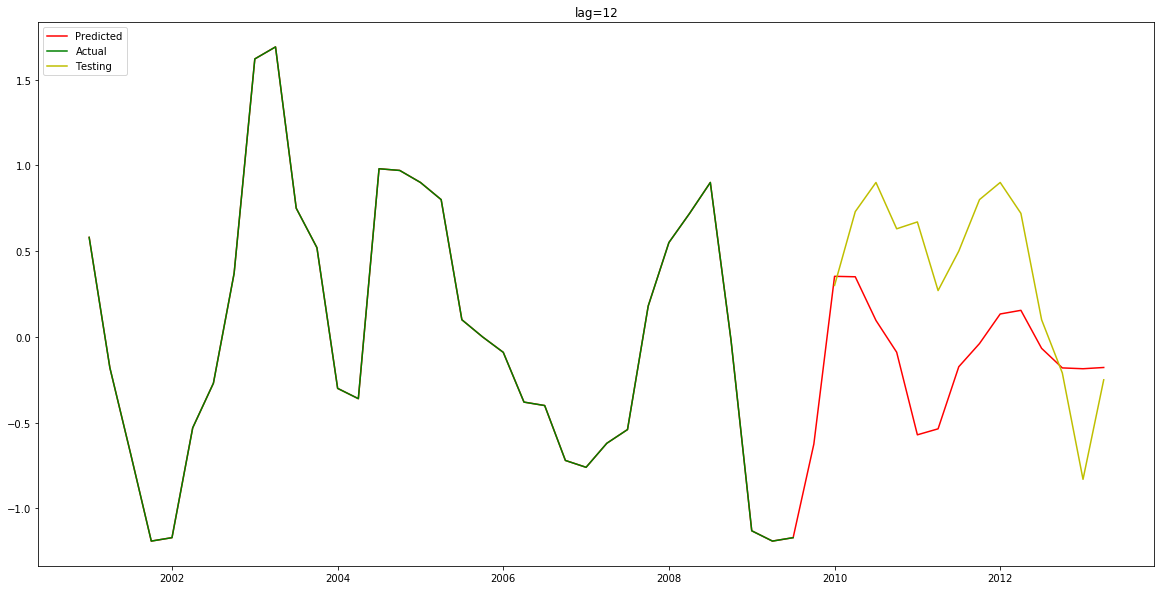

In [185]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = mdata['Saudi Production Change']

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']
plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'r-',label='Predicted')
plt.plot(time[0:35],mdata['Saudi Production Change'],'g-',label='Actual')
plt.plot(test_time,test_data['Saudi Production Change'],'y-',label='Testing')
plt.legend(loc="upper left")

The third variable I chose to test this detrending process was the change in Saudi Arabian production. This data is much noisier, and this is why I choose to test this variable. I suspect that noisy data does not always benefit from detrending and that is why the WTI oil data did not benefit. Let’s see if detrending this variable will help develop my assumption.  

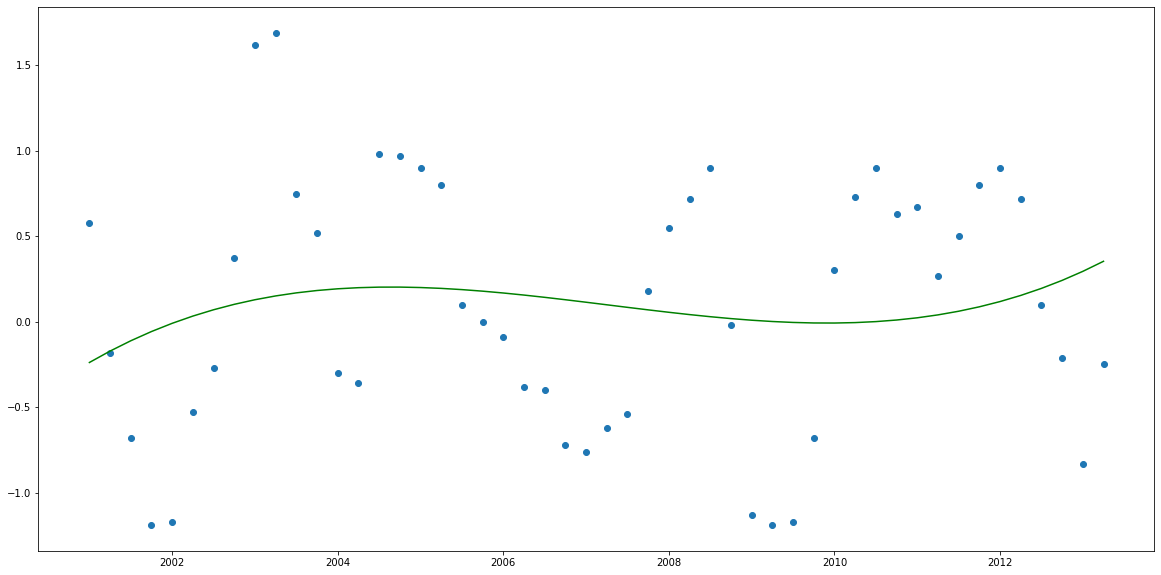

In [194]:
mdata=Oil_Data[0:50]
t=np.polyfit(time[0:50],mdata['Saudi Production Change'],3)

my_oil_poly_function=np.poly1d(t)

expected_oil_poly=my_oil_poly_function(time[0:50])

plt.figure(figsize=(20,10))
plt.scatter(time[0:50],mdata['Saudi Production Change'])
plt.plot(time[0:50],expected_oil_poly, color='green')

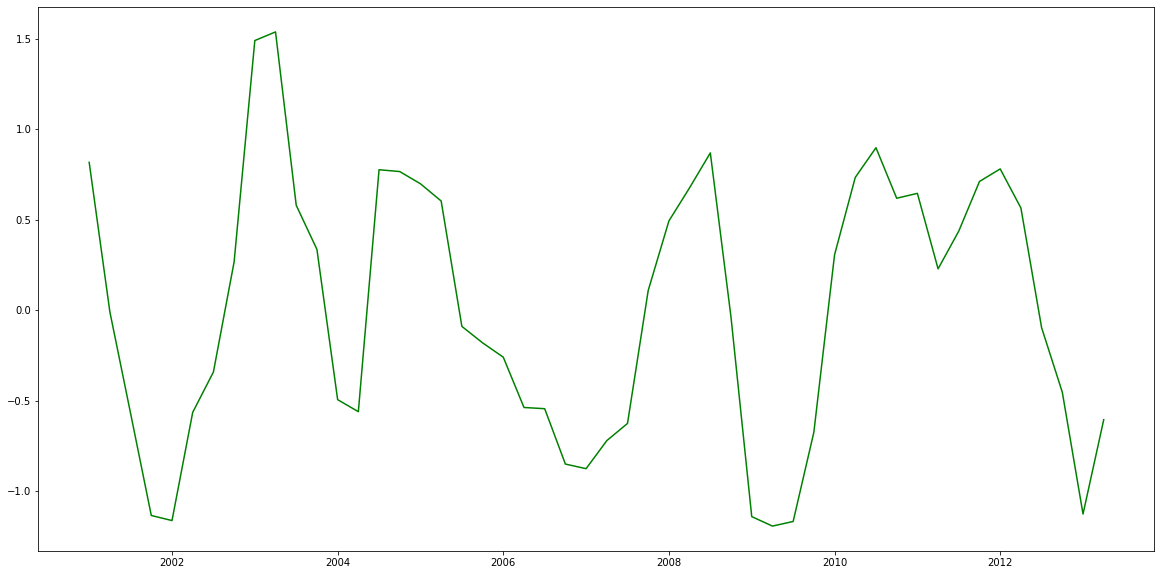

In [195]:
detrending=mdata['Saudi Production Change']-expected_oil_poly

plt.figure(figsize=(20,10))
plt.plot(time[0:50],detrending, color='green')

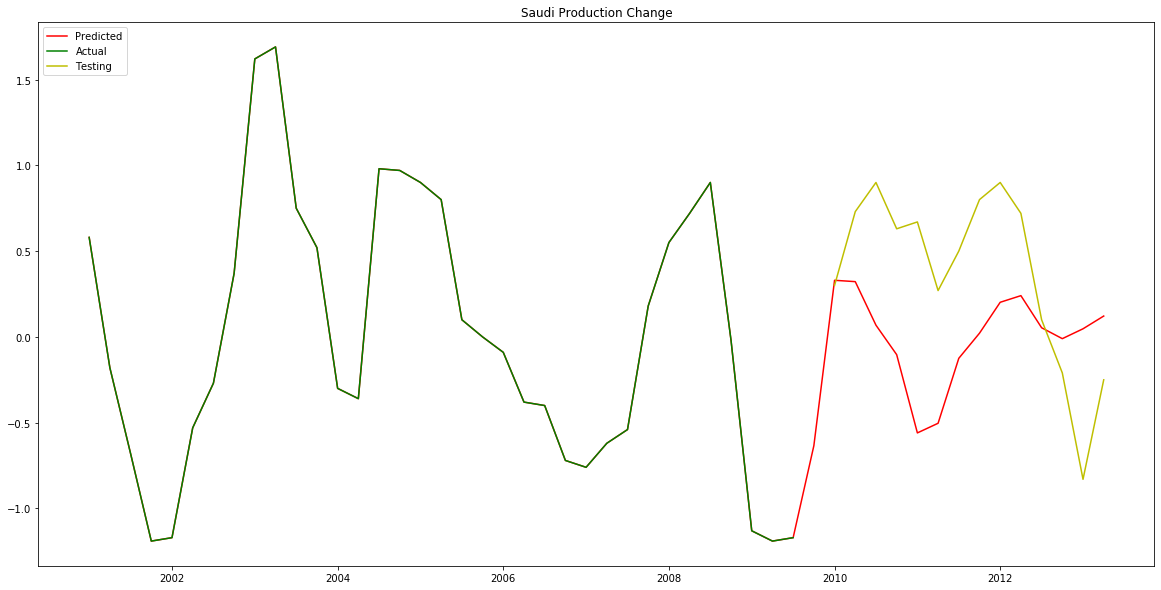

In [198]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = detrending[0:35]

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']

data=data+expected_oil_poly

plt.figure(figsize=(20,10))
plt.title('Saudi Production Change')
plt.plot(time, data, 'r-',label='Predicted')
plt.plot(time[0:35],mdata['Saudi Production Change'],'g-',label='Actual')
plt.plot(test_time,test_data['Saudi Production Change'],'y-',label='Testing')
plt.legend(loc="upper left")

After we go through the detrending process for the third time, we begin to understand more about the detrending process. Detrending was not as effective for this variable, perhaps due to the noise or other variables. We will talk more about this in the results section. 

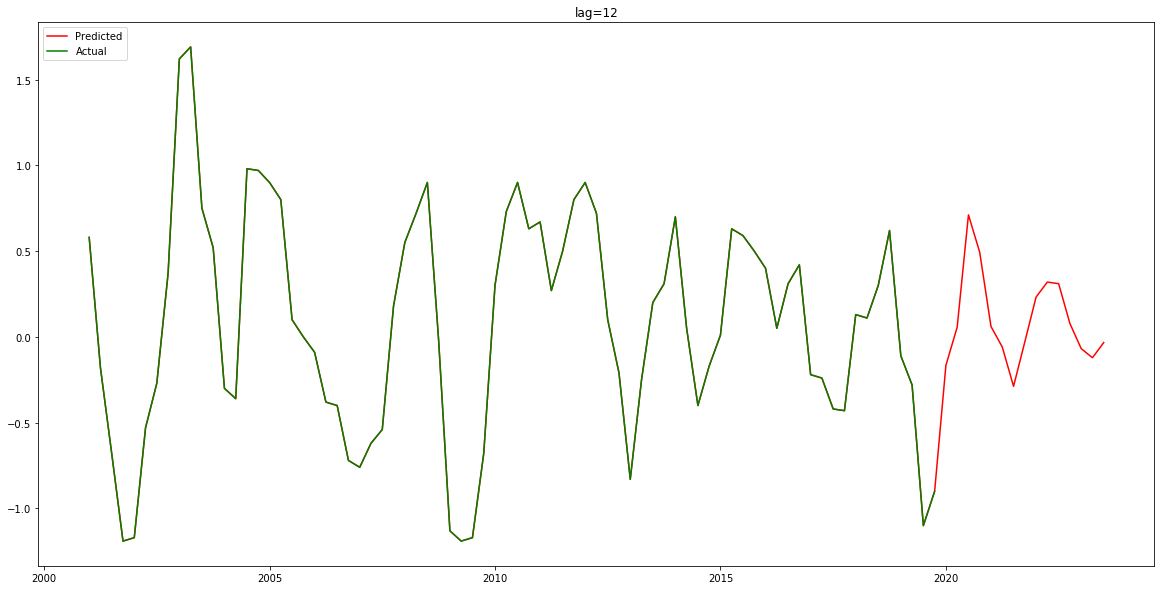

In [228]:
mdata = Oil_Data[0:76]

num_points = len(Oil_Data[0:76])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = mdata['Saudi Production Change']

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
ndata = Oil_Data[0:76] 
plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'r-',label='Predicted')
plt.plot(time[0:76],ndata['Saudi Production Change'],'g-',label='Actual')
plt.legend(loc="upper left")

## Results

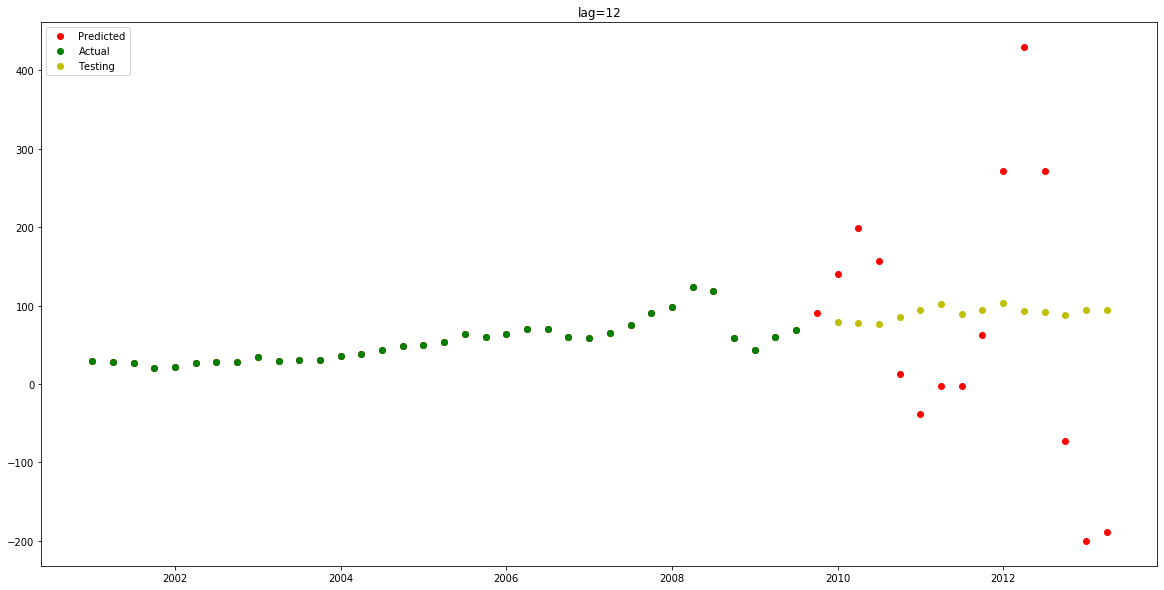

In [242]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = detrending[0:35]

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']

data=data+expected_oil_poly

plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:35],mdata['POILWTIUSDQ'],'go',label='Actual')
plt.plot(test_time,test_data['POILWTIUSDQ'],'yo',label='Testing')
plt.legend(loc="upper left")

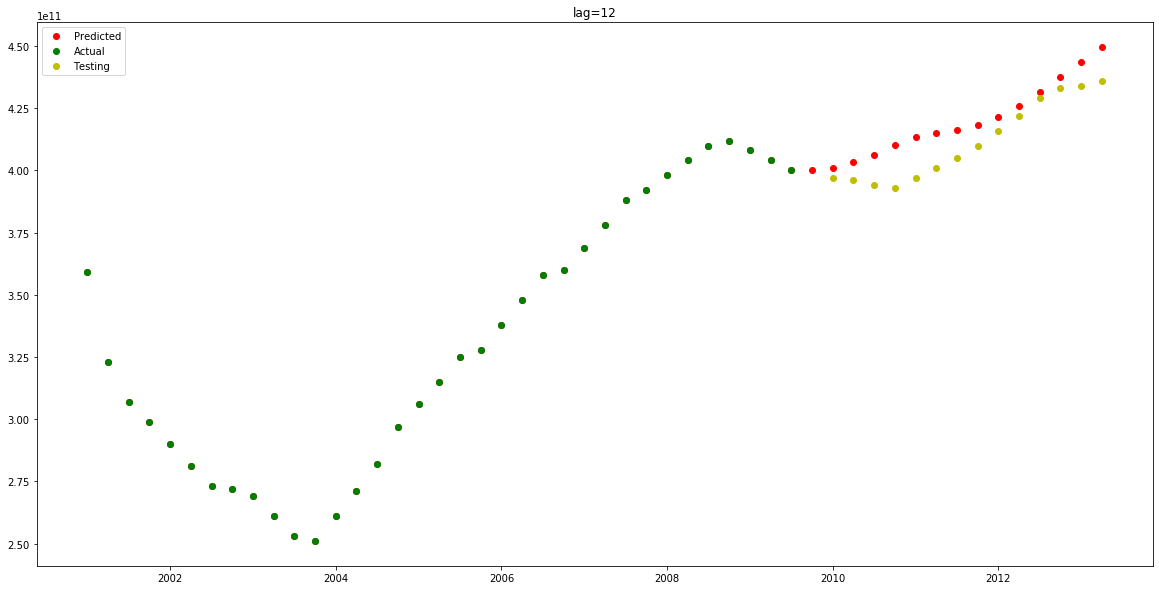

In [257]:
mdata = Oil_Data[0:35]

num_points = len(Oil_Data[0:35])# training points

num_predictions = len(Oil_Data[0:15]) # prediction points

time = mdata['Dates']
del_t = time[1] - time[0]

data = detrending2[0:35]

for iteration in range(num_predictions):

  # fit model 
    model = AR(data)
    model_fit = model.fit(maxlag=10)

  # make prediction
    yhat= model_fit.predict(len(data), len(data))
    data= np.append(data,yhat)
    time = np.append(time, time[len(time)-1]+del_t)
    
test_data=Oil_Data[36:50]
test_time = test_data['Dates']

data=data+expected_oil2_poly

plt.figure(figsize=(20,10))
plt.title('lag=12')
plt.plot(time, data, 'ro',label='Predicted')
plt.plot(time[0:35],mdata['Venezuela, RB'],'go',label='Actual')
plt.plot(test_time,test_data['Venezuela, RB'],'yo',label='Testing')
plt.legend(loc="upper left")

## Discussion and Conclusion

These two plots show us the how detrending affects data when being put through the AR algorithm. In the first plot, the detrending did increase the values to make it a better prediction. However, the prediction points were still unrealistic values as to what the West Texas Intermediate Oil Price could ever be. The second plot then shows us that detrending can help the AR model make better predictions. In the model with the Venezuelan GDP, some of the prediction points happen to touch the actual data points showing the impact that the detrending had on the AR models prediction after the detrending process. To prove my hypothesis, I would have to do many more tests and on various different types of data. However, I have an assumption that data that has more noise affects the way the AR algorithm makes predictions after the data has gone through the detrending process. So, does this answer my question? I think it depends, it is important to always try it out and see if it will make the prediction better. However, noisy data will make it difficult to make a big difference. The detrending process always impacted the prediction, but not always in ways that helped predict realistic values. In my three models, only one enhanced the prediction and reported realistic values, that was my Venezuelan GDP model. I ran into many obstacles throughout this process, that may be because I am new to coding and I am still figuring out some of the simple techniques, I am glad that I challenged myself. I originally wanted to use vector autoregression (VAR) to predict Crude Oil Prices based on multiple variables. However, I was unable to fully understand the VAR process and could not run my data into the algorithm successfully. I was very close and got values, but I am unsure as to how accurate those plots are due to my data having problems with VAR. I hope to figure those problems out and finish my VAR models on my own time. The next time around I will try and find data that has been proven to work in a machine learning algorithm, so that I will not have to fight with the algorithm. This project was very challenging, nevertheless, I learned a lot about machine learning and how to think more analytically. I hope to continue to learn more about machine learning and how I can apply that to business and especially finance. 

### References

Liu, Bowen LiuBowen. “How to Change the Font Size and Color of Markdown Cell in Ipython (Py 2.7) Notebook.” Stack Overflow, 1AD, stackoverflow.com/questions/34303422/how-to-change-the-font-size-and-color-of-markdown-cell-in-ipython-py-2-7-noteb.

Olson, Randy. “How to Make Beautiful Data Visualizations in Python with Matplotlib.” Dr. Randal S. Olson, 25 Feb. 2020, www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/.

“Crude Oil Prices: Brent - Europe.” FRED, 8 May 2019, fred.stlouisfed.org/series/ACOILBRENTEU.

“U.S. Energy Information Administration - EIA - Independent Statistics and Analysis.” Energy &amp; Financial Markets - Crudeoil - U.S. Energy Information Administration (EIA), www.eia.gov/finance/markets/crudeoil/supply-opec.php.

“GDP Growth (Annual %) - Venezuela, RB.” Data, data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?end=2014&amp;locations=VE&amp;start=1960&amp;view=chart.

In [48]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.2em;
padding-left:2.5em;
padding-right:2.5em;
}
</style>
""")